## Import Libraries and Load Data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data
df=pd.read_csv("insurance.csv")

## EDA - Exploratory Data Analysis

In [3]:
df.head() #first 5 entries

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info() # infos about the rows, columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum() # checking for missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have a total of 506 entries with 14 columns of information and some missing values.

In [6]:
df.describe() # statistical infos of the columns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.corr() # the correlation between the columns

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


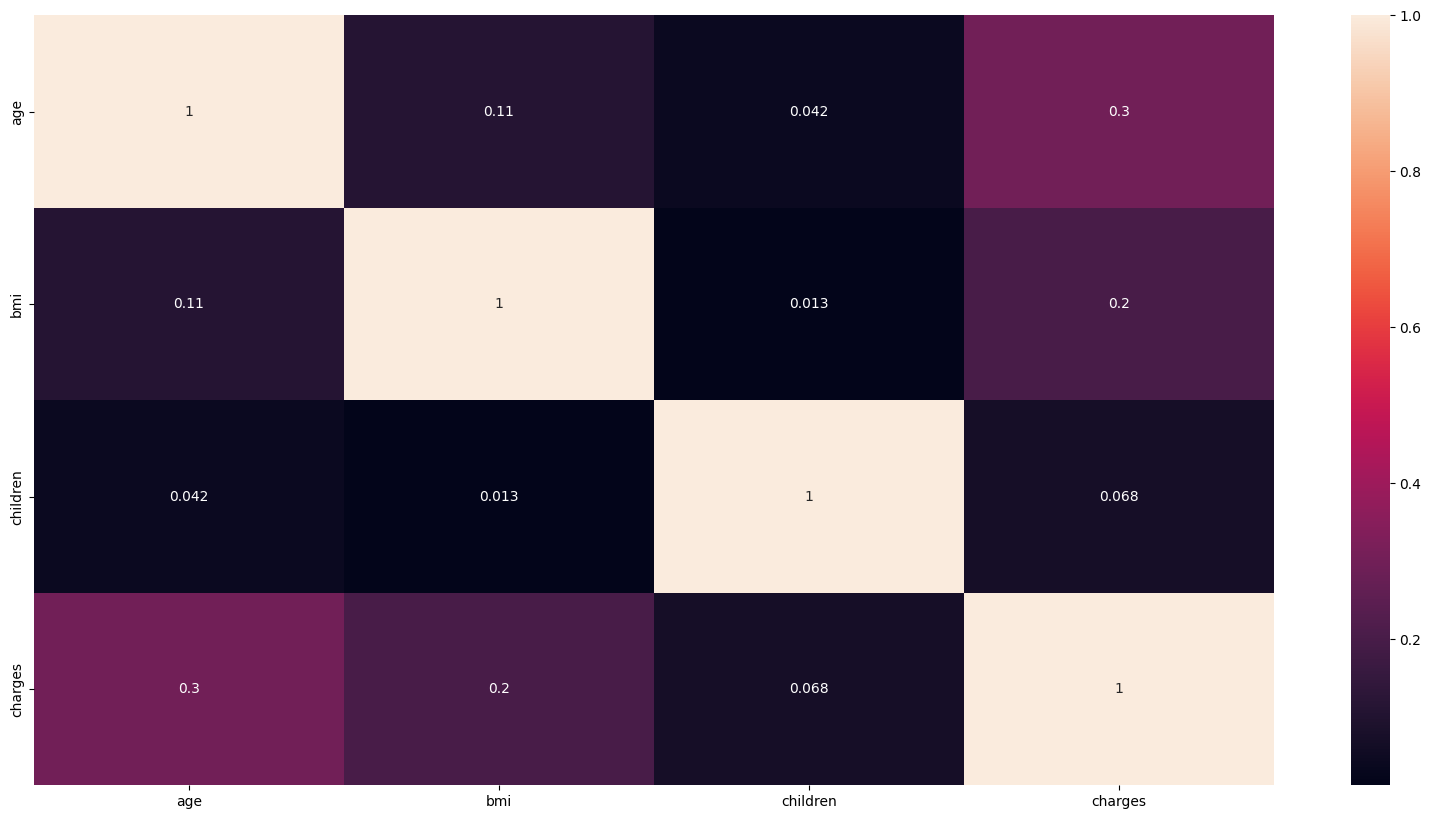

In [8]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True);

#### Data Visualization

Through these boxplots we can see that we have outliers and we have to deal with them.

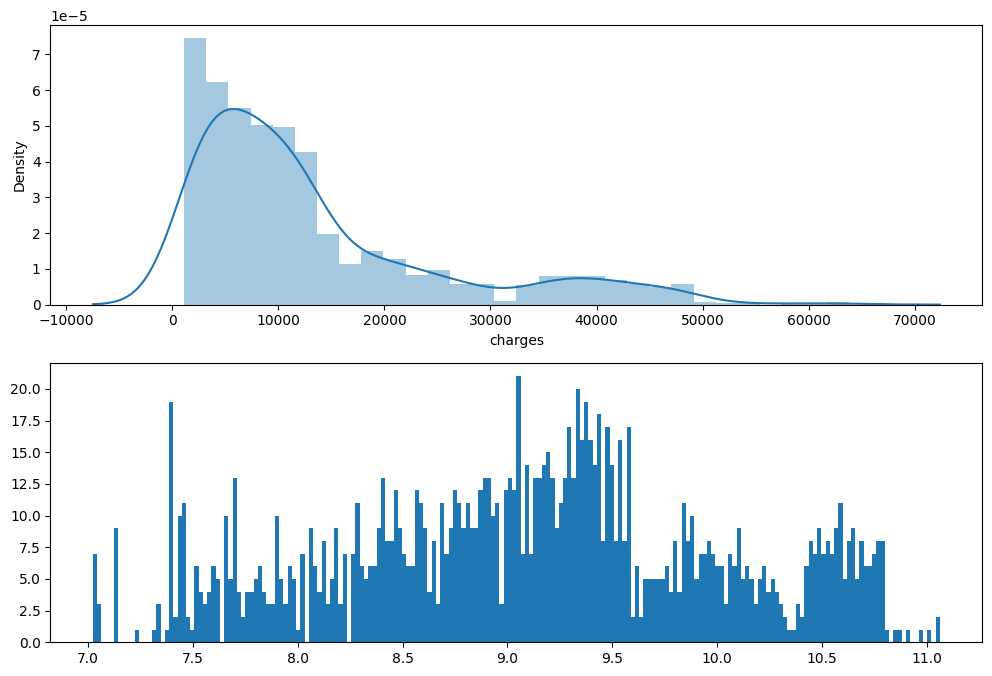

In [14]:
fig = plt.figure(figsize=(10,10)) # plotting the MEDV in different forms
fig.add_subplot(3,1,1)
sns.distplot(df['charges'])
fig.add_subplot(3,1,2)
plt.hist((np.log(df.charges)), bins=200);
plt.tight_layout();

<Axes: xlabel='age', ylabel='charges'>

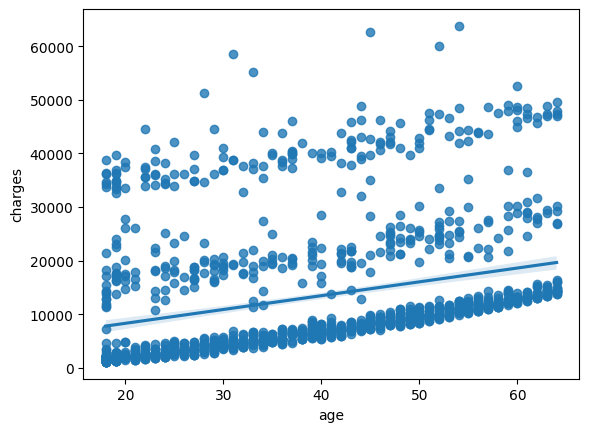

In [19]:
sns.regplot(x='age', y='charges', data = df)

<Axes: xlabel='bmi', ylabel='charges'>

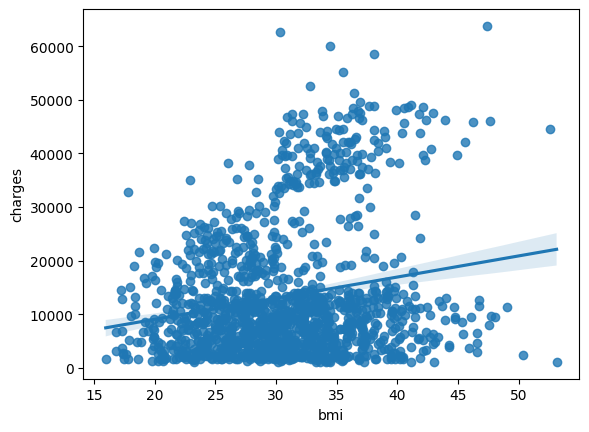

In [20]:
sns.regplot(x='bmi', y='charges', data = df)

<Axes: xlabel='children', ylabel='charges'>

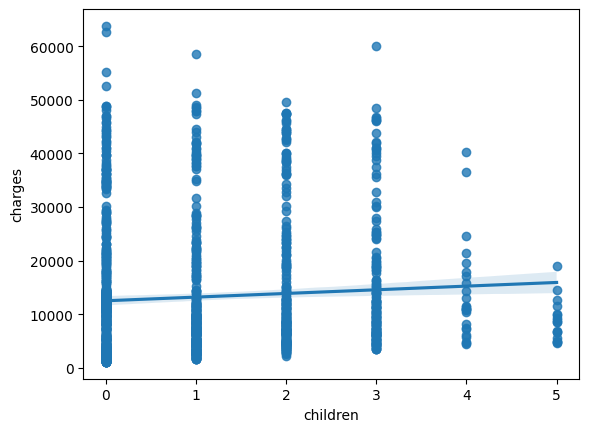

In [21]:
sns.regplot(x='children', y='charges', data = df)

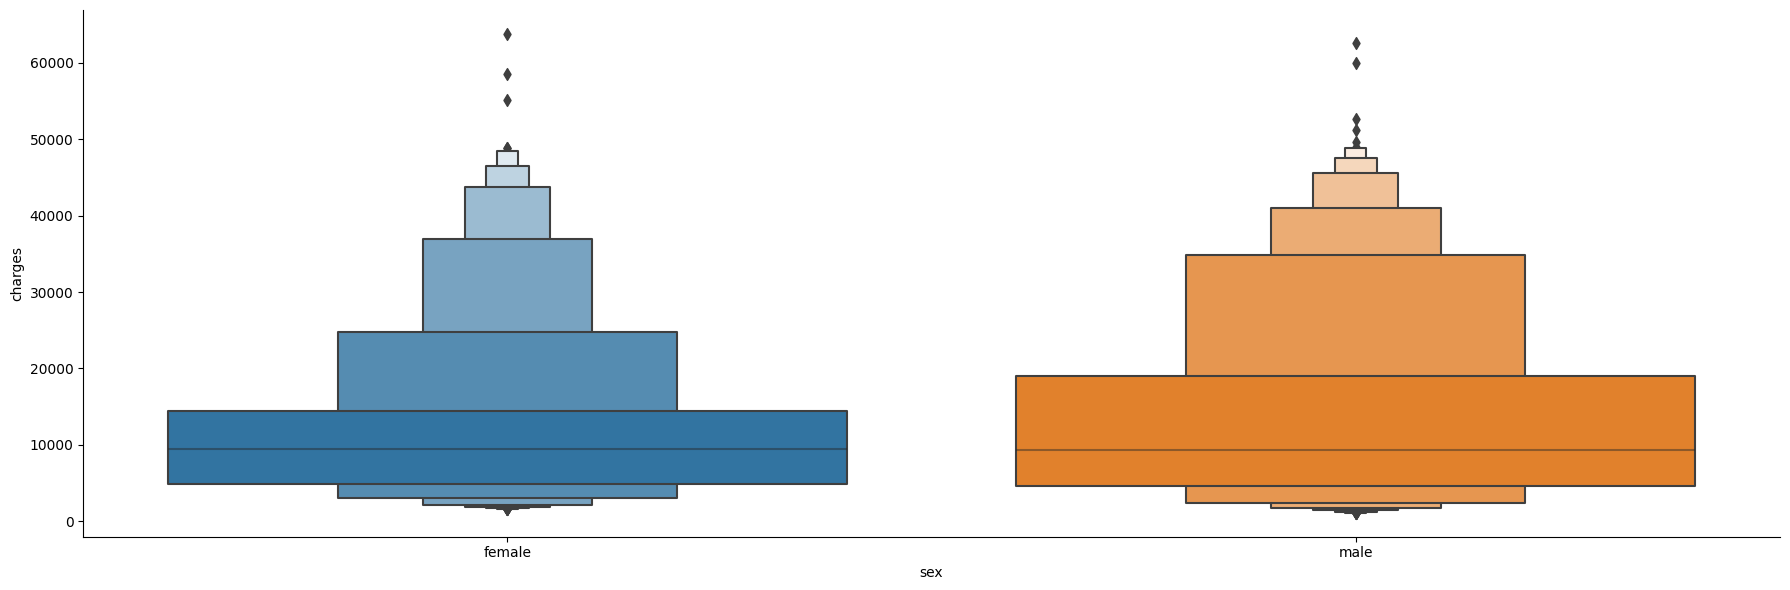

In [25]:
# sex vs charges
sns.catplot(y = "charges", x = "sex", data = df.sort_values("charges", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

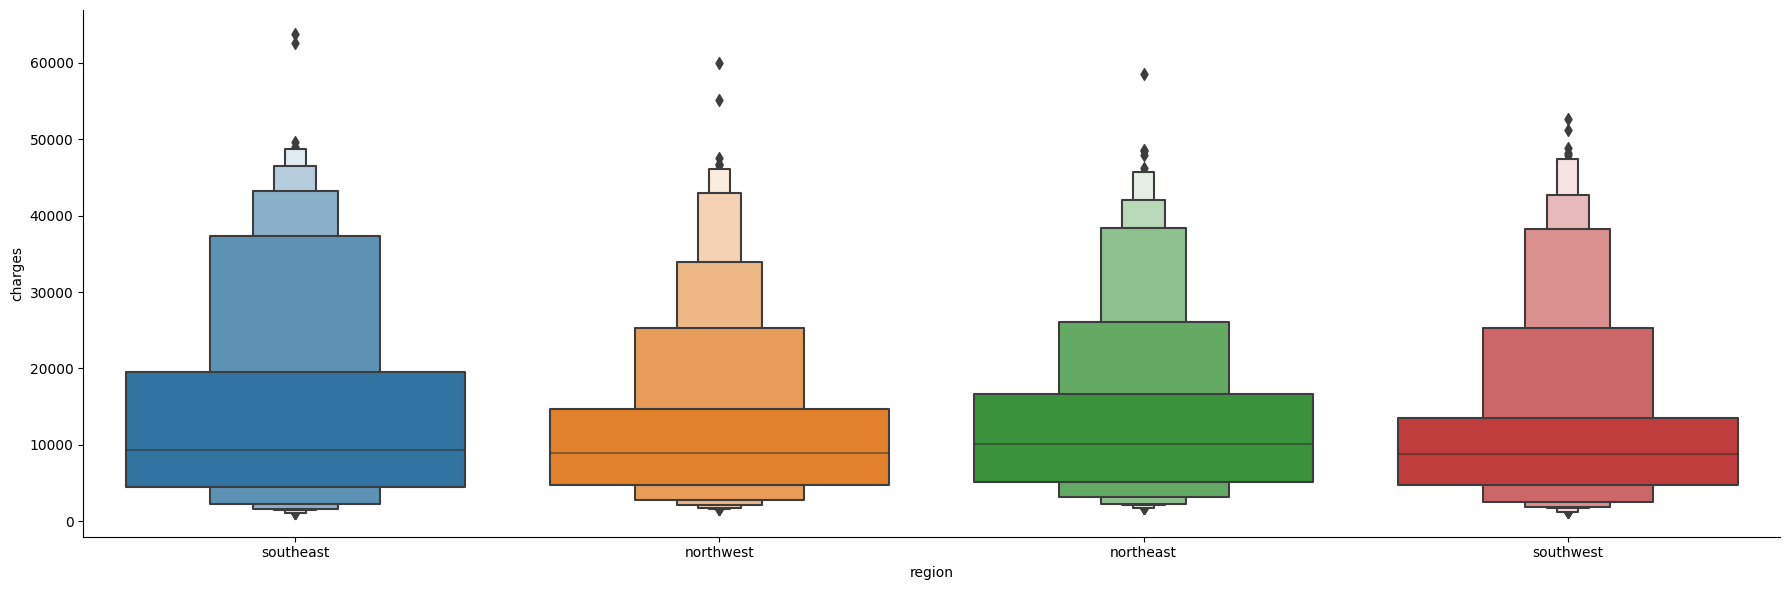

In [26]:
# region vs charges
sns.catplot(y = "charges", x = "region", data = df.sort_values("charges", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

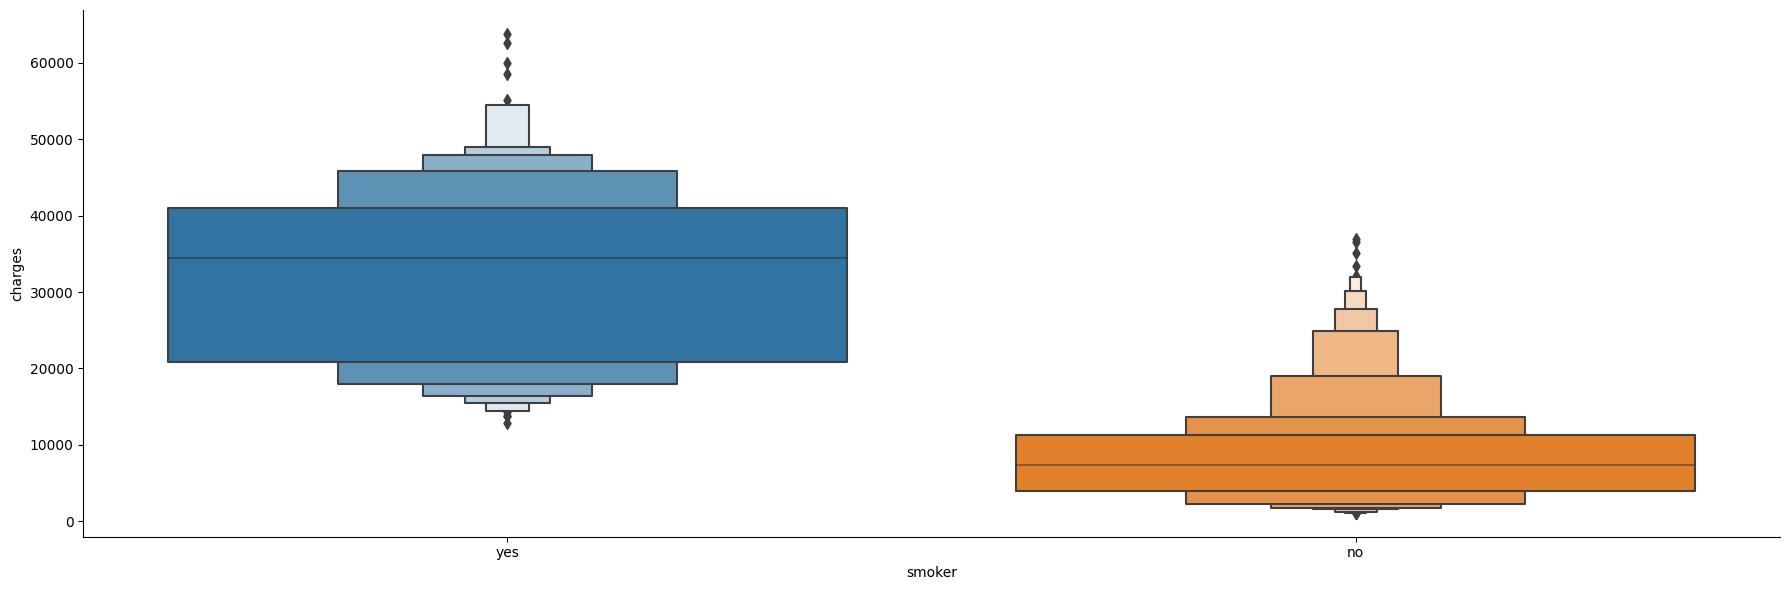

In [27]:
# smoker vs charges
sns.catplot(y = "charges", x = "smoker", data = df.sort_values("charges", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [28]:
# As region is Nominal Categorical data we will perform OneHotEncoding

region = df[["region"]]

region = pd.get_dummies(region, drop_first= True)

region.head()

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [29]:
# As sex is Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df.replace({"male": 0, "female": 2}, inplace = True)

In [30]:
# As smoker is Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df.replace({"yes": 0, "no": 2}, inplace = True)

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,2,southeast,1725.55230
2,28,0,33.000,3,2,southeast,4449.46200
3,33,0,22.705,0,2,northwest,21984.47061
4,32,0,28.880,0,2,northwest,3866.85520


In [35]:
# Concatenate dataframe --> df + region
df= pd.concat([df, region], axis = 1)

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest
0,19,2,27.900,0,0,southwest,16884.92400,0,0,1
1,18,0,33.770,1,2,southeast,1725.55230,0,1,0
2,28,0,33.000,3,2,southeast,4449.46200,0,1,0
3,33,0,22.705,0,2,northwest,21984.47061,1,0,0
4,32,0,28.880,0,2,northwest,3866.85520,1,0,0


In [37]:
df.drop(["region"], axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,2,27.900,0,0,16884.92400,0,0,1
1,18,0,33.770,1,2,1725.55230,0,1,0
2,28,0,33.000,3,2,4449.46200,0,1,0
3,33,0,22.705,0,2,21984.47061,1,0,0
4,32,0,28.880,0,2,3866.85520,1,0,0


In [39]:
X = df.loc[:, ['age',	'sex',	'bmi',	'children',	'smoker',	'region_northwest',	'region_southeast',	'region_southwest']]

In [41]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,2,27.900,0,0,0,0,1
1,18,0,33.770,1,2,0,1,0
2,28,0,33.000,3,2,0,1,0
3,33,0,22.705,0,2,1,0,0
4,32,0,28.880,0,2,1,0,0


In [44]:
y = df.iloc[:, 5]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## MODELING

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [48]:
# split the data in Train and Test 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
GBR = GradientBoostingRegressor()
GBR_model = GBR.fit(x_train,y_train)

In [50]:
GBR_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [51]:
GBR_model_pred = GBR_model.predict(x_test)

In [52]:
GBR_model_pred

array([10825.36952246,  5794.88135154, 27836.17412412, 10011.45214614,
       33446.03408344,  5410.89470146,  3522.88492226, 16800.83640926,
        4661.39290909, 10985.28147003, 17960.91497322,  8135.05112687,
        5302.32463778, 45549.17024532, 47294.49223622, 44888.02722489,
       11068.88475271, 45738.22517045,  9560.96100057, 23353.07691827,
        5779.12113959,  8896.67114556,  1425.18396157,  3369.73927457,
       11460.27410849, 13272.61120303, 15471.20069788,  7182.89883988,
       11442.52940488,  2956.92159025,  7684.23620443, 12206.09200661,
        3656.28002348,  6016.42512141,  4137.03048773,  9702.77774272,
        3697.93453989,  8739.38642895, 24415.01347125, 40702.6674563 ,
        5342.26454524,  4300.79547247, 14045.15871926, 14322.20110959,
        8190.93294855, 16518.33317346,  7493.84858304,  6432.52957262,
       42532.5549437 ,  6821.0957033 , 15309.19097862,  3154.82705887,
        7254.04474308,  1888.80668023, 12345.47905944, 11244.74783627,
      

In [56]:
GBR_model.score(x_train,y_train)

0.8996179662552334

In [57]:
GBR_model.score(x_test,y_test)

0.8791696174026382

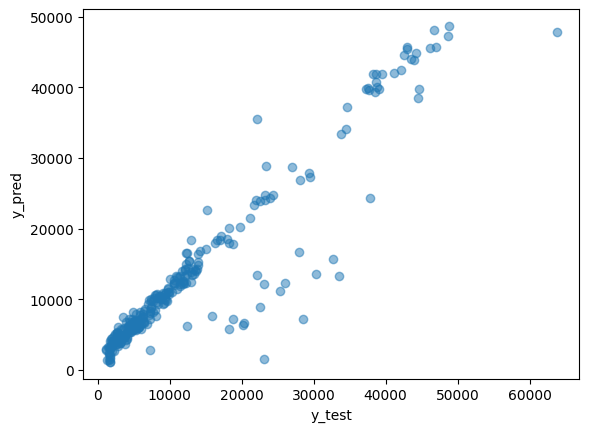

In [59]:
plt.scatter(y_test, GBR_model_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, GBR_model_pred))
print('MSE:', metrics.mean_squared_error(y_test, GBR_model_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GBR_model_pred)))

MAE: 2445.625672425271
MSE: 18758763.623906076
RMSE: 4331.138836831034


In [61]:
import pickle
filename = 'insurance_model.sav'
pickle.dump(GBR_model, open(filename, 'wb'))

In [4]:
import pickle
import streamlit as st
from streamlit_option_menu import option_menu


# loading the saved models
ins_model = pickle.load(open('insurance_model.sav', 'rb'))

# page title
st.title('Insurance Predictive Framework')
    
    
# getting the input data from the user
col1, col2, col3 = st.columns(3)
    
with col1:
  age = st.text_input('Age')
        
with col2:
        if st.checkbox('sex'):
            smoker = 'male'
        else:
            smoker = 'female' 
    
with col3:
  bmi = st.text_input('Body Mass Index')
    
with col1:
  children = st.sidebar.slider('Children', min_value=0, max_value=10, value=0, step = 1)
    
with col2:
        if st.checkbox('Smoker'):
            smoker = 'yes'
        else:
            smoker = 'no'
    
with col3:
  region = st.text_input('Region')
  if (region == 'region_northwest'):
    region_northwest = 1
    region_southeast = 0
    region_southwest = 0
        
  elif (region == 'region_southeast'):
      region_northwest = 0
      region_southeast = 1
      region_southwest = 0

  else:
      region_northwest = 0
      region_southeast = 0
      region_southwest = 1

# creating a button for Prediction

# creating a button for Prediction
if st.button("Predict"):
    output = ins_model.predict([[age, sex,	bmi,	children,	smoker,	region]])
    output = '$' + str(output)
    st.success('The insurance price estimate is: {}'.format(output))

2023-05-03 13:58:28.729 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [1]:
!pip install streamlit 
!pip install streamlit_option_menu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=a491084d5dd872c561a42c28837641f3f52c5ba3227156532e7f26d63889c3f2
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/